# Screen Time DataSet 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('DataFrame.xlsx')
df

,Marca temporal,Edad,Género.,Plataforma más usada.,Intereses,Demografía,Ubicación,Profesión,Personas que viven contigo,Ingresos mensuales fijos en pesos,Cuanto tiempo al día usas tu plataforma más usada? (En horas),Tiempo promedio diario que utilizas tu teléfono al día. (En horas)
0,2024-06-28 19:52:58.038,21.0,Masculino,WhatsApp,Deportes,Urbano,Chihuahua,Estudiante,4.0,9200.0,NaN,NaN
1,2024-06-28 19:54:03.156,21.0,Femenino,Instagram,Deportes,Rural,Chihuahua,Estudiante,0.0,9000.0,NaN,NaN
2,2024-06-28 20:31:52.606,19.0,Masculino,X (Twitter),Deportes,Urbano,Chihuahua,Estudiante,5.0,35.0,2.0,6.0
3,2024-06-28 20:32:49.997,51.0,Masculino,Facebook,Deportes,Urbano,Chihuahua,Negocios,4.0,200000.0,1.0,5.0
4,2024-06-28 20:34:48.982,20.0,Masculino,X (Twitter),Arte,Urbano,Chihuahua,Estudiante,10.0,5600.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2024-07-02 16:49:18.221,31.0,Femenino,WhatsApp,Arte,Urbano,Chihuahua,Ingeniería,0.0,0.0,9.0,19.0
62,2024-07-02 16:58:46.477,37.0,Masculino,WhatsApp,Deportes,Urbano,Chihuahua,Tecnologías de la información,1.0,20000.0,3.0,5.0
63,2024-07-02 16:59:15.786,31.0,Masculino,Instagram,Cine,Urbano,Chihuahua,Ingeniería,3.0,0.0,3.0,4.0
64,2024-07-02 17:00:07.008,22.0,Masculino,WhatsApp,Vida nocturna,Urbano,Chihuahua,Tecnologías de la información,0.0,0.0,1.0,4.0


## Plataforma y su tiempo promedio usado al día.

In [117]:
numeric_columns = df.select_dtypes(include="number").columns
socialMedia = df.groupby(["Plataforma más usada."])[numeric_columns].mean()
platform_avarage = socialMedia[['Cuanto tiempo al día usas tu plataforma más usada? (En horas)', 'Edad']]
platform_avarage = pd.DataFrame(platform_avarage)
platform_avarage.to_csv("platformAvargae")

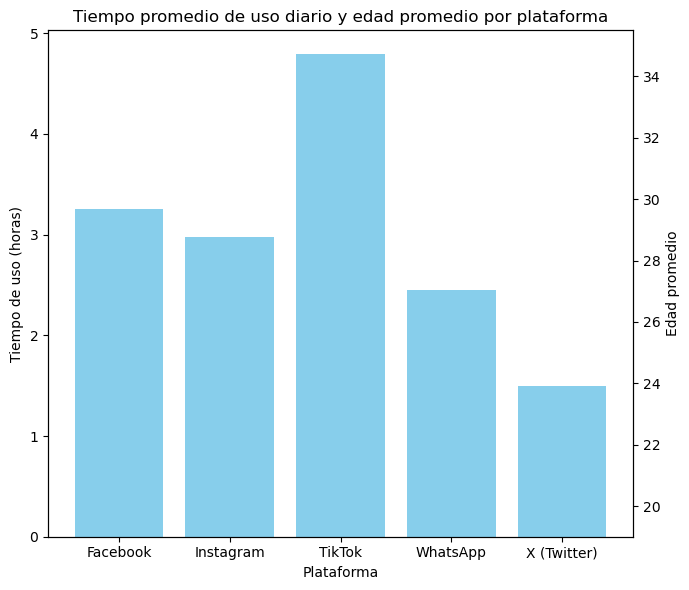

In [114]:
import matplotlib.pyplot as plt

platforms = socialMedia.index
usage_time = socialMedia['Cuanto tiempo al día usas tu plataforma más usada? (En horas)']
age = socialMedia['Edad']

fig, ax1 = plt.subplots(figsize=(7, 6))

ax1.bar(platforms, usage_time, color='skyblue', label='Tiempo de uso (horas)')
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Tiempo de uso (horas)')
ax1.tick_params(axis='y')
ax1.set_title('Tiempo promedio de uso diario y edad promedio por plataforma')

ax2 = ax1.twinx()
ax2.plot(platforms, age, label='Edad promedio', linestyle='None')  
ax2.set_ylabel('Edad promedio')
#ax2.tick_params(axis='y', labelcolor='salmon')

fig.tight_layout()
plt.show()


## Tiempo en panatalla promedio por gaps de edades

In [4]:
y_adults = df[df['Edad'].between(15,25)]
m_adults = df[df['Edad'].between(26, 40)]
o_adults = df[df['Edad'].between(40, 100)]

In [50]:
y1 = y_adults.groupby('Edad')[numeric_columns].mean().describe().iloc[1,[3,4]]
m1 = m_adults.groupby("Edad")[numeric_columns].mean().describe().iloc[1,[3,4]]
o1 = o_adults.groupby("Edad")[numeric_columns].mean().describe().iloc[1,[3,4]]

In [116]:

mycolumns = ['15-25', '26-40', '40-100']
concatenated_df = pd.concat([y1, m1, o1], axis=1)
concatenated_df = pd.DataFrame(concatenated_df)
concatenated_df.columns = mycolumns
concatenated_df.to_csv("ScreenTimeByAge")

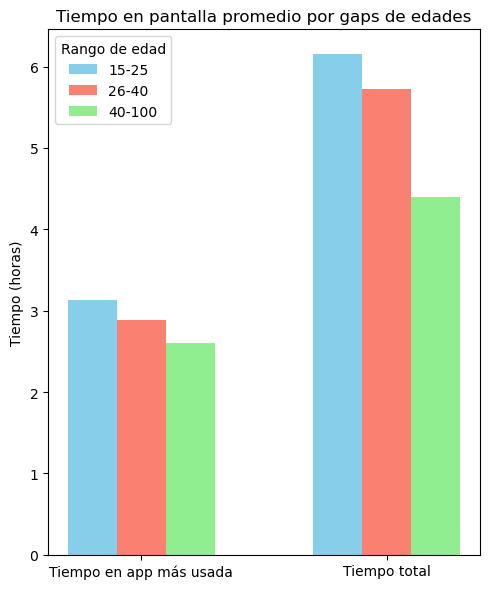

In [115]:
import matplotlib.pyplot as plt
import numpy as np

labels = concatenated_df.index
x = np.arange(len(labels))
width = 0.20

fig, ax = plt.subplots(figsize=(5, 6))

ax.bar(x - width, concatenated_df['15-25'], width, label='15-25', color='skyblue')
ax.bar(x, concatenated_df['26-40'], width, label='26-40', color="salmon")
ax.bar(x + width, concatenated_df['40-100'], width, label='40-100', color="lightgreen")

ax.set_ylabel('Tiempo (horas)')
ax.set_title('Tiempo en pantalla promedio por gaps de edades')
ax.set_xticks(x)
ax.set_xticklabels(["Tiempo en app más usada","Tiempo total"], rotation=0, ha='center')
ax.legend(title='Rango de edad')

plt.tight_layout()
plt.show()